In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import gc
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)


In [2]:
#ucitavanje podataka

df = pd.read_csv('online_retail_II.csv', sep=',')

In [190]:
# Pregled nekoliko pocetnih i krajnjih vrednosti ucitanih podatka

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [193]:
#kratka analiza tiipa podataka

In [5]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [6]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object

In [7]:
df.shape

(1067371, 8)

In [197]:
#Ispitivanje koliko razlicitih proizvoda imamo

In [8]:
df['StockCode'].unique()

array(['85048', '79323P', '79323W', ..., '23609', '23617', '23843'],
      dtype=object)

In [9]:
df['StockCode'].nunique()

5305

In [10]:
df['Description'].unique()

array(['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS',
       ' WHITE CHERRY LIGHTS', ..., 'mixed up',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [11]:
df['Description'].nunique()

5698

In [12]:
#Pretvaranje InvoiceDate labele u DateTime vrednosti

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [205]:
#pretvaranje Customer ID u string 

In [15]:
df['Customer ID'] = df['Customer ID'].apply(str)

In [16]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

In [18]:
gc.collect()

0

In [209]:
#uklanjanje duplikata

In [19]:
df.duplicated().sum()

34335

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.duplicated().sum()

0

In [215]:
#Provera da li postoje null vrednosti(NaN), i njihovo uklanjanje

In [22]:
df.isnull().sum()

Invoice           0
StockCode         0
Description    4275
Quantity          0
InvoiceDate       0
Price             0
Customer ID       0
Country           0
dtype: int64

In [23]:
df.dropna(inplace = True)

In [24]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [219]:
#provera validnosti podataka unutar labela Price i Quantity

In [25]:
df[df['Price'] <= 0].count()

Invoice        1744
StockCode      1744
Description    1744
Quantity       1744
InvoiceDate    1744
Price          1744
Customer ID    1744
Country        1744
dtype: int64

In [26]:
df.drop(df[df['Quantity'] <= 0].index, inplace = True)

In [27]:
df[df['Quantity'] <= 0].count()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [223]:
#Formiranje TotalPrice labele

In [28]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [29]:
df[df['TotalPrice']<=0].count()

Invoice        984
StockCode      984
Description    984
Quantity       984
InvoiceDate    984
Price          984
Customer ID    984
Country        984
TotalPrice     984
dtype: int64

In [30]:
df.drop(df[df['TotalPrice']<=0].index, inplace = True)

In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [228]:
#Podela InvoiceDate na godinu,mesec i dan(Podela transakcija na godisnjem,mesecnom i dnevnom nivou)

In [32]:
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year

In [33]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,1,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,1,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1,12,2009


In [231]:
#Pravljenje labele year_month od meseca i godine, koju cemo aksnije da koristimo za index
#Treba uzeeti u obzir da zbog nacina na koji smo spajali ove dve labele, kada pretvorimo u datetime dobicemo i konkretan dan

In [34]:
df['year_month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Convert 'year_month' to datetime
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')


In [35]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year,year_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,1,12,2009,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,12,2009,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,1,12,2009,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,1,12,2009,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,1,12,2009,2009-12-01


In [36]:
df=df.set_index('year_month')

In [37]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year
year_month,,,,,,,,,,,,
2011-12-01,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,9,12,2011
2011-12-01,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011
2011-12-01,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,9,12,2011
2011-12-01,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,9,12,2011
2011-12-01,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,18.00,9,12,2011


In [236]:
#Posto je set podataka prevelik izdvjamo samo godinu od interesa, u ovom slucaju je to 2011 godina

In [38]:
df=df[df['Year']==2011]

In [39]:
df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year
year_month,,,,,,,,,,,,
2011-01-01,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,4,1,2011
2011-01-01,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,4,1,2011
2011-01-01,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,4,1,2011
2011-01-01,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,4,1,2011
2011-01-01,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,4,1,2011
2011-01-01,539993,85099B,JUMBO BAG RED RETROSPOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,4,1,2011
2011-01-01,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-01-04 10:00:00,3.25,13313.0,United Kingdom,19.5,4,1,2011
2011-01-01,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04 10:00:00,1.45,13313.0,United Kingdom,17.4,4,1,2011
2011-01-01,539993,22667,RECIPE BOX RETROSPOT,6,2011-01-04 10:00:00,2.95,13313.0,United Kingdom,17.7,4,1,2011


In [239]:
#Na osnovu prethodnih pokusaja, zakljucili smo da nam je set podataka i dalje prevelik
#Konkretno koristila sam podatke samo za 2011 godinu, prilikom ispitivanja stacionarnosti i samog treniranja dobila sam 
#MemoryError sto indicira da nemam dovoljno RAM memorije na racunaru, racunar na kome je ovo pokusano ima 16 GB RAM memorije
#Tako da zbog hardveskog ogranicenja sam izabrala da uzmem samo trecinu proizvoda

In [40]:
proizvodi=df['StockCode'].unique()
type(proizvodi)
duzina=len(proizvodi)//3
pola_proizvoda=proizvodi[:duzina]
df = df[df['StockCode'].isin(pola_proizvoda)]

In [241]:
#Pronalaženje kupaca koji obavljaju kupovine na veliko:

In [41]:
# Izračunajte 80% kvantil za TotalPrice
threshold_amount = df['TotalPrice'].quantile(0.8)

# Pronađite kupce čije su ukupne kupovine veće od 80% kvantila
wholesale_customers = df.groupby('Customer ID')['TotalPrice'].sum()
wholesale_customers = wholesale_customers[wholesale_customers > threshold_amount]


In [42]:
wholesale_customers

Customer ID
12347.0      1640.29
12348.0       282.68
12349.0      1188.08
12350.0       304.40
12352.0      2098.26
             ...    
18281.0        25.38
18282.0       105.15
18283.0      1095.76
18287.0      1020.34
nan        994654.40
Name: TotalPrice, Length: 4116, dtype: float64

In [ ]:
#Analiza koliko često obavljaju takve kupovine:

In [43]:
# Pretvorite InvoiceDate u datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


# Grupišite po kupcima i analizirajte vremenski raspon između transakcija
wholesale_purchase_frequency = df[df['Customer ID'].isin(wholesale_customers.index)]
wholesale_purchase_frequency = wholesale_purchase_frequency.groupby('Customer ID')['InvoiceDate'].diff().mean()


In [44]:
wholesale_purchase_frequency

Timedelta('1 days 18:17:44.074336911')

In [ ]:
#Pronalaženje redovnih kupaca:

In [45]:
transaction_counts = df['Customer ID'].value_counts()
print(transaction_counts.describe())

count     4153.000000
mean        66.156032
std       1077.240394
min          1.000000
25%          9.000000
50%         22.000000
75%         54.000000
max      69018.000000
Name: count, dtype: float64


In [46]:
neki_odredjeni_broj_transakcija=54#izabrali smo ovo jer je u 75% 
threshold_quantity = neki_odredjeni_broj_transakcija

In [47]:
regular_customers = df['Customer ID'].value_counts()
regular_customers = regular_customers[regular_customers > neki_odredjeni_broj_transakcija]

In [48]:
regular_customers

Customer ID
nan        69018
17841.0     4146
14096.0     2853
14911.0     2830
12748.0     1788
           ...  
16987.0       55
13533.0       55
14130.0       55
13650.0       55
13344.0       55
Name: count, Length: 1029, dtype: int64

In [ ]:
#Analiza onih koji su kupovali samo jednom:

In [49]:
one_time_customers = df['Customer ID'].value_counts()
one_time_customers = one_time_customers[one_time_customers == 1]

In [50]:
one_time_customers

Customer ID
17026.0    1
15802.0    1
15759.0    1
14816.0    1
16990.0    1
          ..
15753.0    1
16078.0    1
12814.0    1
15567.0    1
17905.0    1
Name: count, Length: 94, dtype: int64

In [ ]:
#Quantity

In [51]:

# Pronađite 10% kupaca koji su najviše kupili u smislu Quantity
top_quantity_customers = df.groupby('Customer ID')['Quantity'].sum()
top_quantity_customers = top_quantity_customers[top_quantity_customers > threshold_quantity].index

# Ispis rezultata

print("\n10% kupaca koji su najviše kupili (u smislu Quantity):")
print(top_quantity_customers)


10% kupaca koji su najviše kupili (u smislu Quantity):
Index(['12347.0', '12348.0', '12349.0', '12350.0', '12352.0', '12354.0',
       '12355.0', '12356.0', '12357.0', '12358.0',
       ...
       '18260.0', '18261.0', '18262.0', '18263.0', '18265.0', '18272.0',
       '18274.0', '18283.0', '18287.0', 'nan'],
      dtype='object', name='Customer ID', length=3494)


In [52]:
len(df)

274746

In [ ]:
#Plotovanje   redukovanog DataFrame-a,sve labele

<Axes: xlabel='year_month'>

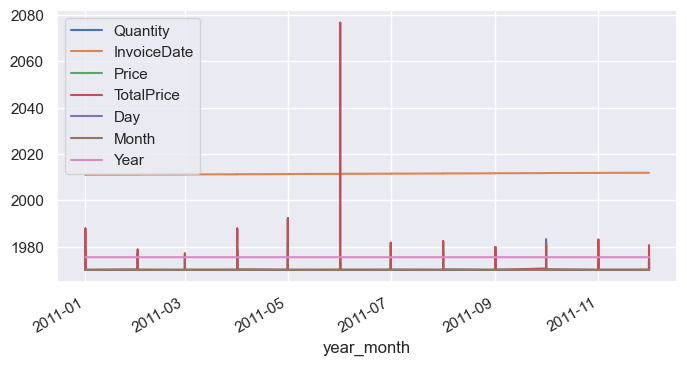

In [53]:
df.plot()

In [ ]:
#Plotovanje   redukovanog DataFrame-a,labela TotalPrice u zavisnosti od labele Month

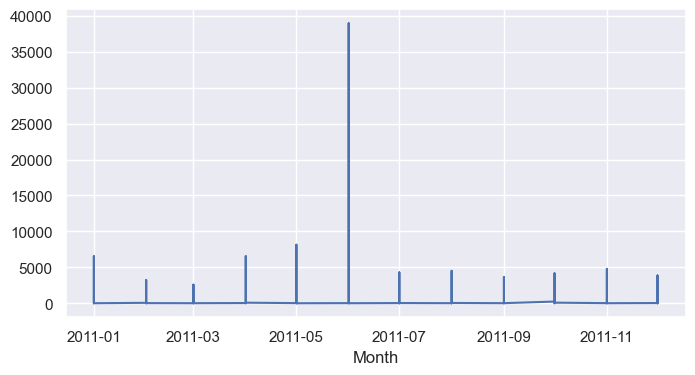

In [54]:
x, y = df.index, df['TotalPrice']
plt.plot(x, y); plt.xlabel('Month');

In [ ]:
#Koristicemo Garbage Collector kako bi nakon izvrsenih radnji oslobodili reference u RAM memoriji koje se ne koriste

In [55]:
import gc
gc.collect()

3093

In [56]:
#Autokorelacija

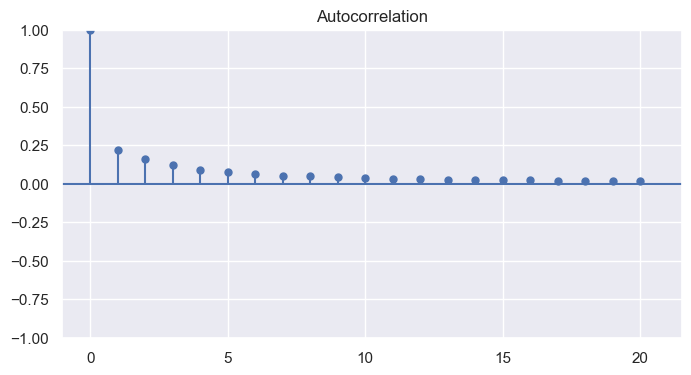

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['TotalPrice'], lags=20)
plt.show()

In [58]:
import gc
gc.collect()

3248

In [ ]:
#Parcijalna Autokorelacija

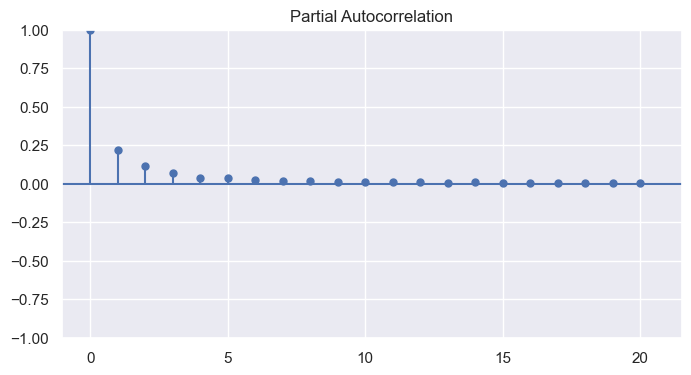

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['TotalPrice'], lags=20)
plt.show()

In [60]:
gc.collect()

3250

In [ ]:
#Logaritmovanje labele TotalPrice zbog buducih potreba

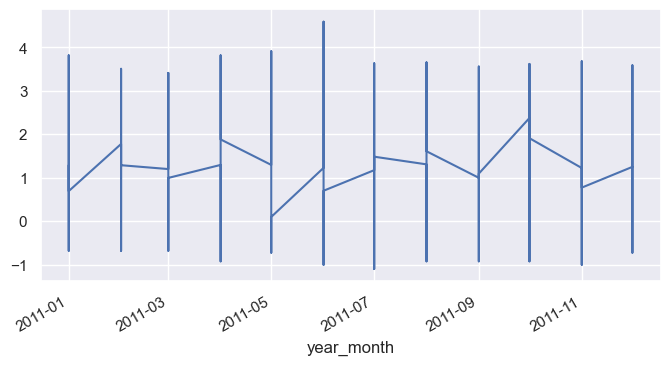

In [61]:
df['log10(TotalPrice)'] = np.log10(df['TotalPrice'])
df['log10(TotalPrice)'].plot();

In [62]:
gc.collect()

2788

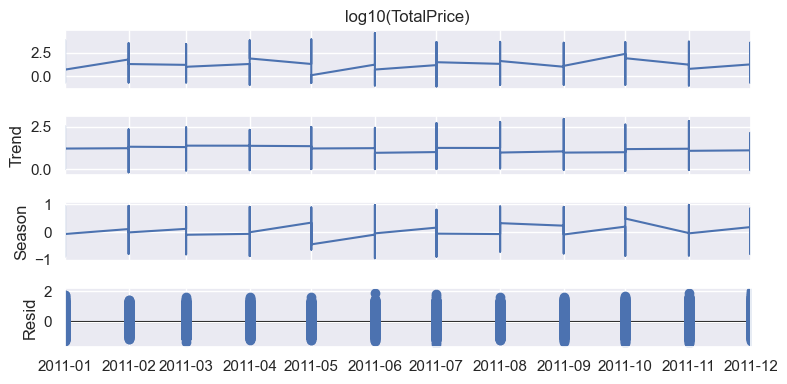

In [63]:
from statsmodels.tsa.seasonal import STL
seasonal_period = 12
stl = STL(df['log10(TotalPrice)'],period=12 ).fit()

stl.plot()

plt.show()

trend, seasonal, resid = stl.trend, stl.seasonal, stl.resid

In [90]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year,log10(TotalPrice)
year_month,,,,,,,,,,,,,
2011-01-01,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.5,4,1,2011,1.00000
2011-01-01,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,4,1,2011,1.39794
2011-01-01,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.5,4,1,2011,1.39794
2011-01-01,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.5,4,1,2011,0.69897
2011-01-01,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.5,4,1,2011,1.00000


In [64]:
gc.collect()

11377

In [ ]:
#Proveravanje stacionarnosti

adf_value=-55.97, p_value=0.00
postoji stacionarnost


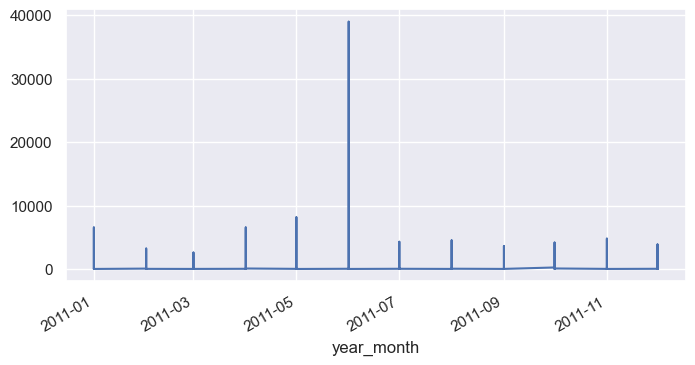

In [92]:
df['TotalPrice'].plot();
from statsmodels.tsa.stattools import adfuller
adf_value = adfuller(df['TotalPrice'])[0] 
p_value = adfuller(df['TotalPrice'])[1]
print(f'{adf_value=:.2f}, {p_value=:.2f}')

if p_value <= 0.05: print('postoji stacionarnost')
else: print('ne postoji stacionarnost')

In [94]:
gc.collect()

0

adf_value=-42.08, p_value=0.00
postoji stacionarnost


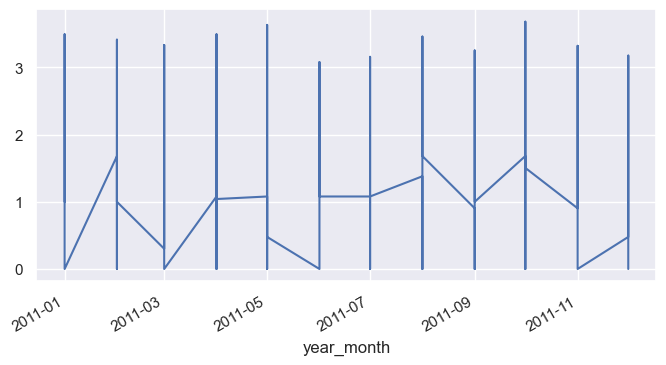

In [95]:
df['log10(TotalPrice)'].plot();
from statsmodels.tsa.stattools import adfuller
adf_value = adfuller(df['log10(TotalPrice)'])[0] 
p_value = adfuller(df['log10(TotalPrice)'])[1]
print(f'{adf_value=:.2f}, {p_value=:.2f}')

if p_value <= 0.05: print('postoji stacionarnost')
else: print('ne postoji stacionarnost')

In [96]:
gc.collect()

2601

In [ ]:
#Podela na train i val podatke

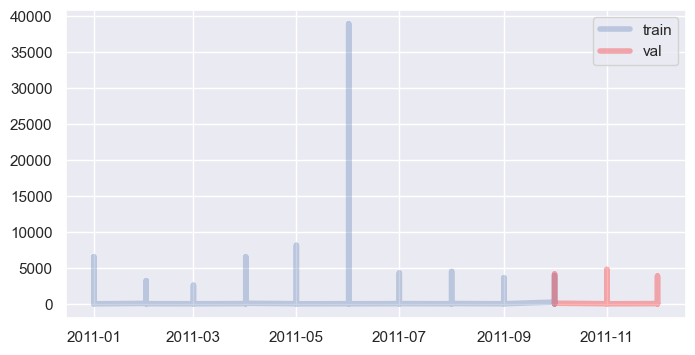

In [264]:

dataset_split = int(len(df['TotalPrice']) * 0.8)
train_df = df[:dataset_split].copy()
val_df  =  df[dataset_split:].copy()

plt.plot(train_df['TotalPrice'], color='b', linewidth=4, alpha=0.3, label='train')
plt.plot(val_df['TotalPrice'], color='red', linewidth=4, alpha=0.3, label='val')
plt.legend()
plt.show()

In [99]:
dataset_split

219796

In [ ]:
#Implementacija AR MODELA

In [100]:
from statsmodels.tsa.arima.model import ARIMA

In [265]:
p, d, q = 12, 0, 0
ar_model = ARIMA(train_df['log10(TotalPrice)'], order=(p, d, 0)).fit()
print(ar_model.summary())

C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      log10(TotalPrice)   No. Observations:               219796
Model:                ARIMA(12, 0, 0)   Log Likelihood             -105673.156
Date:                Thu, 08 Feb 2024   AIC                         211374.311
Time:                        16:01:03   BIC                         211518.518
Sample:                             0   HQIC                        211416.581
                             - 219796                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9712      0.005    204.596      0.000       0.962       0.980
ar.L1          0.3940      0.002    237.324      0.000       0.391       0.397
ar.L2          0.1442      0.002     73.382      0.0

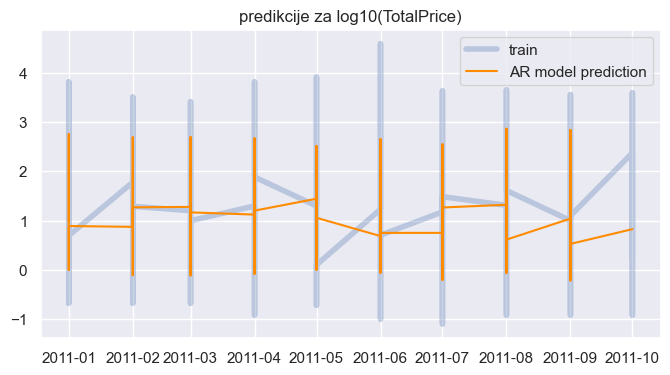

In [266]:
y_train_pred = ar_model.predict(start=train_df.index[p+1], end=train_df.index[-1])

plt.plot(train_df['log10(TotalPrice)'], color='b', linewidth=4, alpha=0.3, label='train')
plt.plot(y_train_pred, color='darkorange', label='AR model prediction')
plt.title('predikcije za log10(TotalPrice)')
plt.legend()
plt.show()

In [307]:
y_train_pred.index

DatetimeIndex(['2009-12-01', '2009-12-01', '2009-12-01', '2009-12-01',
               '2009-12-01', '2009-12-01', '2009-12-01', '2009-12-01',
               '2009-12-01', '2009-12-01',
               ...
               '2010-02-01', '2010-02-01', '2010-02-01', '2010-02-01',
               '2010-02-01', '2010-02-01', '2010-02-01', '2010-02-01',
               '2010-02-01', '2010-03-01'],
              dtype='datetime64[ns]', name='year_month', length=237, freq=None)

In [267]:
gc.collect()

14862

In [106]:
kraj=val_df.index[-1]

In [113]:
print(type(kraj))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [110]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [109]:
df.index = pd.to_datetime(df.index)

In [ ]:
#Predikcija nad validacionim podacima, treba napomenuti da je namerno izostavljen parametar end u predikciji
#TO je odradjeno iz razloga sto smo selektovali 1/3 proizvoda i samim tim nam  indexi(Koji rpedstavljaju datum) se ne 
#pojavljuju dovoljno frekventno pa nam izbacuje gresku

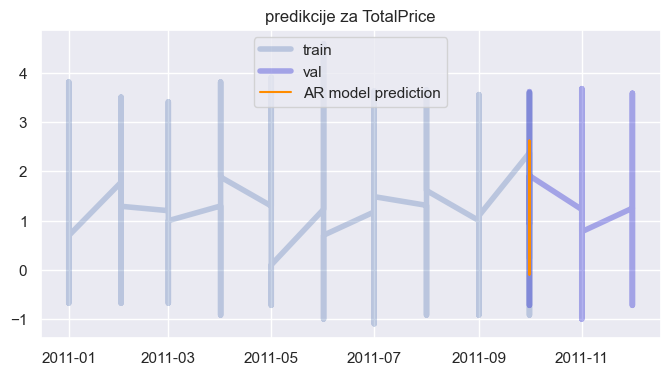

In [268]:
val_df['log10(TotalPrice)'] = np.log10(val_df['TotalPrice'])
y_val_pred = ar_model.predict(start=val_df.index[0])

plt.plot(train_df['log10(TotalPrice)'], color='b', linewidth=4, alpha=0.3, label='train')
plt.plot(val_df['log10(TotalPrice)'], color='mediumblue', linewidth=4, alpha=0.3, label='val')

plt.plot(y_val_pred, color='darkorange', label='AR model prediction')
plt.title('predikcije za TotalPrice')
plt.legend()
plt.show()

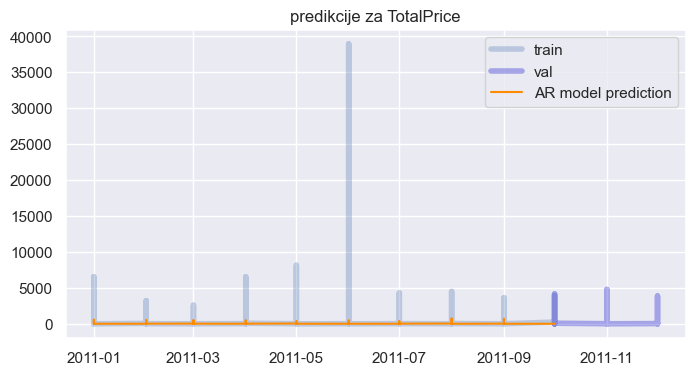

In [269]:
# predict automatski radi inverzne operacije od diferenciranja
y_pred = ar_model.predict(start=train_df.index[p+1],end=val_df.index[5000])
# eksponenciranje
y_pred = np.power(10, y_pred)

plt.plot(train_df['TotalPrice'], color='b', linewidth=4, alpha=0.3, label='train')
plt.plot(val_df['TotalPrice'], color='mediumblue', linewidth=4, alpha=0.3, label='val')
plt.plot(y_pred, color='darkorange', label='AR model prediction')
plt.title('predikcije za TotalPrice')
plt.legend()
plt.show()

In [177]:
len(y_pred)

197981

In [131]:
train_df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year,log10(TotalPrice)
year_month,,,,,,,,,,,,,
2011-10-01,572872,85014B,RED RETROSPOT UMBRELLA,1,2011-10-26 13:27:00,5.95,15320.0,United Kingdom,5.95,26,10,2011,0.00000
2011-10-01,572872,15056N,EDWARDIAN PARASOL NATURAL,1,2011-10-26 13:27:00,5.95,15320.0,United Kingdom,5.95,26,10,2011,0.00000
2011-10-01,572872,21888,BINGO SET,2,2011-10-26 13:27:00,3.75,15320.0,United Kingdom,7.50,26,10,2011,0.30103
2011-10-01,572872,21912,VINTAGE SNAKES & LADDERS,2,2011-10-26 13:27:00,3.75,15320.0,United Kingdom,7.50,26,10,2011,0.30103
2011-10-01,572872,21790,VINTAGE SNAP CARDS,2,2011-10-26 13:27:00,0.85,15320.0,United Kingdom,1.70,26,10,2011,0.30103


In [132]:
val_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Day,Month,Year,log10(TotalPrice)
year_month,,,,,,,,,,,,,
2011-10-01,572872,22113,GREY HEART HOT WATER BOTTLE,2,2011-10-26 13:27:00,4.25,15320.0,United Kingdom,8.50,26,10,2011,0.929419
2011-10-01,572872,22669,RED BABY BUNTING,5,2011-10-26 13:27:00,2.95,15320.0,United Kingdom,14.75,26,10,2011,1.168792
2011-10-01,572872,84030E,ENGLISH ROSE HOT WATER BOTTLE,2,2011-10-26 13:27:00,4.25,15320.0,United Kingdom,8.50,26,10,2011,0.929419
2011-10-01,572872,22620,4 TRADITIONAL SPINNING TOPS,2,2011-10-26 13:27:00,1.45,15320.0,United Kingdom,2.90,26,10,2011,0.462398
2011-10-01,572873,22086,PAPER CHAIN KIT 50'S CHRISTMAS,6,2011-10-26 13:27:00,2.95,12820.0,United Kingdom,17.70,26,10,2011,1.247973


In [159]:
len(val_df)

54950

In [160]:
#Implementacija Arima modela


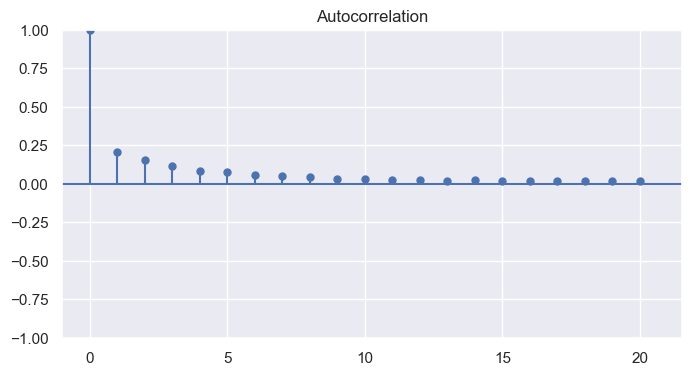

In [161]:
plot_acf(train_df['TotalPrice'].dropna(), lags=20)
plt.show()

In [167]:
gc.collect()

2671

C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


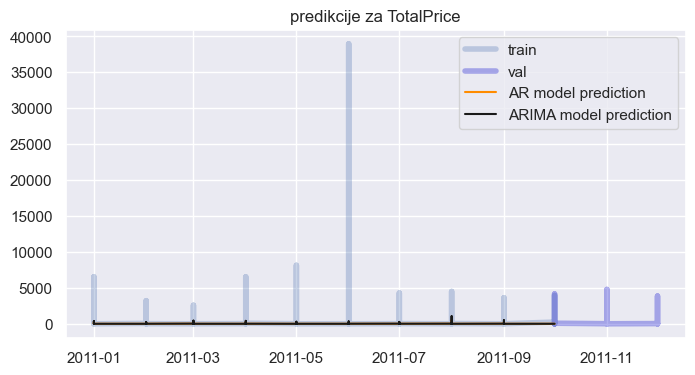

In [168]:
p, d, q = 12, 2, 2
arima_model = ARIMA(train_df['log10(TotalPrice)'], order=(p, d, q)).fit()

y_pred_arima = arima_model.predict(start=train_df.index[p+1], end=val_df.index[5000])
y_pred_arima = np.power(10, y_pred_arima)

plt.plot(train_df['TotalPrice'], color='b', linewidth=4, alpha=0.3, label='train')
plt.plot(val_df['TotalPrice'], color='mediumblue', linewidth=4, alpha=0.3, label='val')
plt.plot(y_pred, color='darkorange', label='AR model prediction')
plt.plot(y_pred_arima, color='k', label='ARIMA model prediction')
plt.title('predikcije za TotalPrice')
plt.legend()
plt.show()

In [ ]:
#Evaluacija resenja i pronalazenje najboljeg modela

In [186]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mse = mean_squared_error
mae = mean_absolute_error
mape = mean_absolute_percentage_error

actual = val_df['TotalPrice']
actual=actual[:5000]
ar_pred = ar_model.predict(start=val_df.index[0])
ar_pred = np.power(10, ar_pred) 
ar_pred=ar_pred[:5000]
print('AR model evaluacija nad validacionim skupom:')
print(f'{mse(actual, ar_pred)=:.2f}', f'{mae(actual, ar_pred)=:.2f}')

arima_pred = arima_model.predict(start=val_df.index[0])
arima_pred = np.power(10, arima_pred) 
arima_pred=arima_pred[:5000]
print('\nARIMA model evaluacija nad validacionim skupom:')
print(f'{mse(actual, arima_pred)=:.2f}', f'{mae(actual, arima_pred)=:.2f}')

AR model evaluacija nad validacionim skupom:
mse(actual, ar_pred)=9304.11 mae(actual, ar_pred)=18.21

ARIMA model evaluacija nad validacionim skupom:
mse(actual, arima_pred)=9575.12 mae(actual, arima_pred)=19.26


In [ ]:
#PRedikcija buducih vrednosti nije bila moguca kao sto ovde mozetye videti po eroru, nisam pronasla adekvatan nacin kako bih
#redukovala set za ovaj korak tako da sam ostavila kao dokaz 

In [187]:
def walk_forward_loop(train_df, val_df, column_name, order=(0, 0, 0)):
    history = train_df[column_name].copy() # trening skup koji prosirujemo stvarnom vrednosti
    wf_pred = pd.Series() # serija predikcija koju iterativno popunjavamo
    
    for i in range(len(val_df)):
        wf_model = ARIMA(history, order=order).fit()
        # sačuvaj predikciju
        y_pred = wf_model.forecast(steps=1)
        wf_pred = pd.concat([wf_pred, y_pred])
        # sačuvaj stvarnu vrednost u trening skup
        true_value = pd.Series(data=val_df.iloc[i][column_name], index=[val_df.index[i]])
        history = pd.concat([history, true_value])
    
    return wf_pred

# evaluiramo
actual = val_df['TotalPrice']
wf_pred = walk_forward_loop(train_df, val_df, column_name='log10(TotalPrice)', order=(p, d, q))
wf_pred = np.power(10, wf_pred)
print('ARIMA walk-forward evaluacija nad validacionim skupom:')
print(f'{mse(actual, wf_pred)=:.2f}', f'{mae(actual, wf_pred)=:.2f}')

# crtamo grafik
plt.plot(train_df['TotalPrice'], color='b', linewidth=4, alpha=0.3, label='train')
plt.plot(val_df['TotalPrice'], color='mediumblue', linewidth=4, alpha=0.3, label='val')
plt.plot(wf_pred, color='darkorange', label='Walk-forward model prediction')
plt.title('predikcije za Passengers')
plt.legend()
plt.show()

C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dakic\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

MemoryError: Unable to allocate 329. MiB for an array with shape (14, 14, 219798) and data type float64